# Sound Classification for behaviour analysis.

In this notebook, ten different types of sounds are used to create a classifier capable to classify these sounds. The purpose of creating this model is to help identify anti-social and criminal behaviour from sound clips. In this notebook, we will first do some important EDA on these sounds to know what we are dealing with. After this we will be extracting features from these sound waves and perform some preprecessing techniques to createa dataset that we can use to train our model. We will try to use various models and hyper parameters to obtain the best results.


## Evaluation

We have trained 3 ANN models with diffrent parameters and one model trained with PCA components. We need to evaluate our models properly so that the performance does not drop when the model is deployed in the real word enviornment. To evaluate the models we can use the confusion matrix that we created for each model in the previous section. Using the confusuin matrix, we have already observed the classification report. The Classification report shows the precision, recall and f1 score of individual classes as well as averages to these values. The report also shows the average accuracy of the model. Although the classification report does not show the sensitivity and specificity of the model, we can calculate these using the confusion matrix. We can also create ROC AUC curves for the models to see at what threshold value we can get the best result for all the classes. 

We have saved all the models, and we can run the models individually to create a confusion matrix again to find the remaining evaluation criteria.

In [14]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np

Lets create a fuction that we can use to calculate the Avg. specificity, specificity per class and Avg. loss of the models. For this we will use the formulae of these quantities using true possitives, false possitives, true negatives and false negatives.

In [15]:
def specificity (conf_matrix):
    Spec_per_class=[]
    loss=0
    Los=[]
    Specificity=0
    dia=np.sum(np.diag(conf_matrix))
    for i in range(10):
        TP = conf_matrix[i][i]         # True Possitives
        sum=0
        for j in range(10):
            sum=sum+conf_matrix[j][i]   
        FP = sum-TP                    # False Possitives
        TN = dia-TP                    # True Negatives
        FN = np.sum(conf_matrix[i])-TP # False Negatives
        spec=TN/(TN+FP)                # Specificity
        Specificity=spec+Specificity
        Spec_per_class.append(spec)
        loss=(FP+FN)/(FP+FN+TP+TN)     # Also calculated loss
        Los.append(loss)    
    Loss=np.sum(Los)/10
    Avg_Specificity = Specificity/10    # Taking average value
    classes=['air_conditioner', 'car_horn','children_playing',
           'dog_bark','drilling','engine_idling','gun_shot',
           'jackhammer', 'siren', 'street_music']
    Spec_per_class=pd.DataFrame(data=Spec_per_class,index=classes,columns=['Specificity'])
    
    
    return(Avg_Specificity,Spec_per_class,Loss)

we will now load the first model again to evaluate it first.

### model-1

In [16]:
model_1 = load_model('ann_1.h5')

In [17]:
classes = ['air_conditioner', 'car_horn','children_playing',
           'dog_bark','drilling','engine_idling','gun_shot',
           'jackhammer', 'siren', 'street_music']

In [18]:
pred_1 = np.argmax(model_1.predict(X_test),axis=1)
true = np.argmax(y_test, axis=1)
cf_matrix_1 = confusion_matrix(true, pred_1)
print(cf_matrix_1)

[[97  0  2  0  0  0  0  0  0  1]
 [ 1 32  0  0  1  2  1  1  2  3]
 [ 4  1 86  2  2  1  0  0  1  3]
 [ 1  0  4 79  0  1  5  0  5  5]
 [ 0  0  3  0 91  0  1  3  2  0]
 [ 0  0  3  0  0 97  0  0  0  0]
 [ 1  0  2  0  1  0 34  0  0  0]
 [ 1  1  0  0  2  1  0 93  0  2]
 [ 0  0  2  0  0  0  0  0 90  1]
 [ 3  1 16  0  0  0  1  1  0 78]]


The confusuion matrix shows the number of true possitives, false positives, true negatives and false negatives.

In [19]:
print(classification_report(true, pred_1,target_names=classes))

                  precision    recall  f1-score   support

 air_conditioner       0.90      0.97      0.93       100
        car_horn       0.91      0.74      0.82        43
children_playing       0.73      0.86      0.79       100
        dog_bark       0.98      0.79      0.87       100
        drilling       0.94      0.91      0.92       100
   engine_idling       0.95      0.97      0.96       100
        gun_shot       0.81      0.89      0.85        38
      jackhammer       0.95      0.93      0.94       100
           siren       0.90      0.97      0.93        93
    street_music       0.84      0.78      0.81       100

        accuracy                           0.89       874
       macro avg       0.89      0.88      0.88       874
    weighted avg       0.89      0.89      0.89       874



In [20]:
Avg_specificity,Spec_per_class,Loss=specificity(cf_matrix_1)
print('Average Specificity = %.2f'% Avg_specificity)
print('Loss = %.3f'% Loss)
print('\nClass',((Spec_per_class*100).astype(int))/100)

Average Specificity = 0.99
Loss = 0.024

Class                   Specificity
air_conditioner          0.98
car_horn                 0.99
children_playing         0.95
dog_bark                 0.99
drilling                 0.99
engine_idling            0.99
gun_shot                 0.98
jackhammer               0.99
siren                    0.98
street_music             0.97


The first model is a basic ANN and gives a good performance. The average precision of the model is 89% with no individual class precision less than 80% except for children playing. The individual recall values are also good with average recall at 88%. The f1-score, that is the harmonic mean of the recall and precision, is also at 88% which is a good value too. The accuracy of the model is also 89%. We can see that the loss value for this model is also very low, 2.2% which is a good sign. Also that the specificity is 99%. All these values are good to be used for this task and hyper paraeter tunning improves the performance too.

### Model-2

In [21]:
model_2 = load_model('ann_nnp.h5')

In [22]:
pred_2 = np.argmax(model_2.predict(X_test),axis=1)
cf_matrix_2 = confusion_matrix(true, pred_2)
print(cf_matrix_2)

[[97  0  0  1  0  0  0  0  0  2]
 [ 1 32  1  1  0  0  1  0  1  6]
 [ 3  0 79 10  3  0  0  1  0  4]
 [ 2  2  6 84  0  0  2  0  2  2]
 [ 0  3  1  1 90  0  0  3  1  1]
 [ 0  3  1  0  0 94  1  0  0  1]
 [ 0  0  0  3  0  0 35  0  0  0]
 [ 0  1  1  0  3  1  0 94  0  0]
 [ 0  1  1  0  0  0  0  0 90  1]
 [ 2  1  3  1  3  0  0  0  0 90]]


In [23]:
print(classification_report(true, pred_2,target_names=classes))

                  precision    recall  f1-score   support

 air_conditioner       0.92      0.97      0.95       100
        car_horn       0.74      0.74      0.74        43
children_playing       0.85      0.79      0.82       100
        dog_bark       0.83      0.84      0.84       100
        drilling       0.91      0.90      0.90       100
   engine_idling       0.99      0.94      0.96       100
        gun_shot       0.90      0.92      0.91        38
      jackhammer       0.96      0.94      0.95       100
           siren       0.96      0.97      0.96        93
    street_music       0.84      0.90      0.87       100

        accuracy                           0.90       874
       macro avg       0.89      0.89      0.89       874
    weighted avg       0.90      0.90      0.90       874



In [24]:
Avg_specificity_2,Spec_per_class_2,Loss_2=specificity(cf_matrix_2)
print('Average Specificity = %.2f'% Avg_specificity_2)
print('Loss = %.3f'% Loss_2)
print('\nClass',((Spec_per_class_2*100).astype(int))/100)

Average Specificity = 0.99
Loss = 0.022

Class                   Specificity
air_conditioner          0.98
car_horn                 0.98
children_playing         0.98
dog_bark                 0.97
drilling                 0.98
engine_idling            0.99
gun_shot                 0.99
jackhammer               0.99
siren                    0.99
street_music             0.97


With changing the model arcitecture, we observe that this mmodel performs better than the first modl. We see an increase in all the values, which makes the model a very good choice. As for this task, our main concern is that we want to have highest number of true possitives and lowest number of false negatives as we want to know how many audio signals have antisocial/ criminal behaviour in them, we can afford some fasle positives but we can not neglect the the false negatives as these can be emergency situations that are reported as false alarm. Thus we need a higher value of recall in this case. But the recall value is same for both of the models, 89%, although the accuracy has increased in the second. We will observe the third model which is optimised using random serach to see if recall increases or not. 

### model-3

In [25]:
model_3 = load_model('ann_tuned.h5')

In [26]:
pred_3 = np.argmax(model_3.predict(X_test),axis=1)
cf_matrix_3 = confusion_matrix(true, pred_3)
print(cf_matrix_3)

[[97  0  2  1  0  0  0  0  0  0]
 [ 1 33  0  0  0  0  2  2  2  3]
 [ 0  1 88  0  1  1  0  1  3  5]
 [ 1  2  8 82  2  0  2  0  3  0]
 [ 0  0  0  0 94  0  0  3  3  0]
 [ 0  0  0  1  0 98  0  0  0  1]
 [ 1  0  0  1  1  0 35  0  0  0]
 [ 0  1  0  0  3  0  0 96  0  0]
 [ 0  0  1  0  0  0  0  0 89  3]
 [ 2  0  2  1  1  0  0  1  1 92]]


In [27]:
print(classification_report(true, pred_3,target_names=classes))

                  precision    recall  f1-score   support

 air_conditioner       0.95      0.97      0.96       100
        car_horn       0.89      0.77      0.82        43
children_playing       0.87      0.88      0.88       100
        dog_bark       0.95      0.82      0.88       100
        drilling       0.92      0.94      0.93       100
   engine_idling       0.99      0.98      0.98       100
        gun_shot       0.90      0.92      0.91        38
      jackhammer       0.93      0.96      0.95       100
           siren       0.88      0.96      0.92        93
    street_music       0.88      0.92      0.90       100

        accuracy                           0.92       874
       macro avg       0.92      0.91      0.91       874
    weighted avg       0.92      0.92      0.92       874



In [28]:
Avg_specificity_3,Spec_per_class_3,Loss_3=specificity(cf_matrix_3)
print('Average Specificity = %.2f'% Avg_specificity_3)
print('Loss = %.3f'% Loss_3)
print('\nClass',((Spec_per_class_3*100).astype(int))/100)

Average Specificity = 0.99
Loss = 0.017

Class                   Specificity
air_conditioner          0.99
car_horn                 0.99
children_playing         0.98
dog_bark                 0.99
drilling                 0.98
engine_idling            0.99
gun_shot                 0.99
jackhammer               0.99
siren                    0.98
street_music             0.98


This is an optimized model and performs very good as compared to the previous too. We get a boost of 3% in the Avg. recall which brings the value at 91%. This model alos has an accuracy of 92% with only 1.7% loss. All other values like specificitu precision and F1score are also very good. If we see the AUC ROC plot for the three models we will have a broader view of the performance of the models too.

### AUC-ROC plot

The AUC-ROC (Area Under the Receiver Operating Characteristic Curve) is a widely used metric for evaluating the performance of binary classification models. The AUC-ROC plot is a graph that visualizes the relationship between the true positive rate (TPR) and false positive rate (FPR) of a model at different classification thresholds. Although AUC-ROC plot is used for binary classification models, we can plot multiple plots for all the classes to see the performance of the model for all the classes. The plot with the highest values for all classes will be selected as the best model.

The AUC-ROC plot helps in choosing a model because it provides a comprehensive overview of the performance of the model across all possible classification thresholds. A model with a high AUC-ROC score indicates that the model is able to distinguish between positive and negative classes with high accuracy and has a low false positive rate.

By comparing the AUC-ROC scores of different models, you can identify which model performs better. The model with the higher AUC-ROC score is generally considered to be the better model.

In [29]:
from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import roc_curve,auc

In [30]:
pred_prob_1 = model_1.predict_proba(X_test)


pred_prob_2 = model_2.predict_proba(X_test)


pred_prob_3 = model_3.predict_proba(X_test)

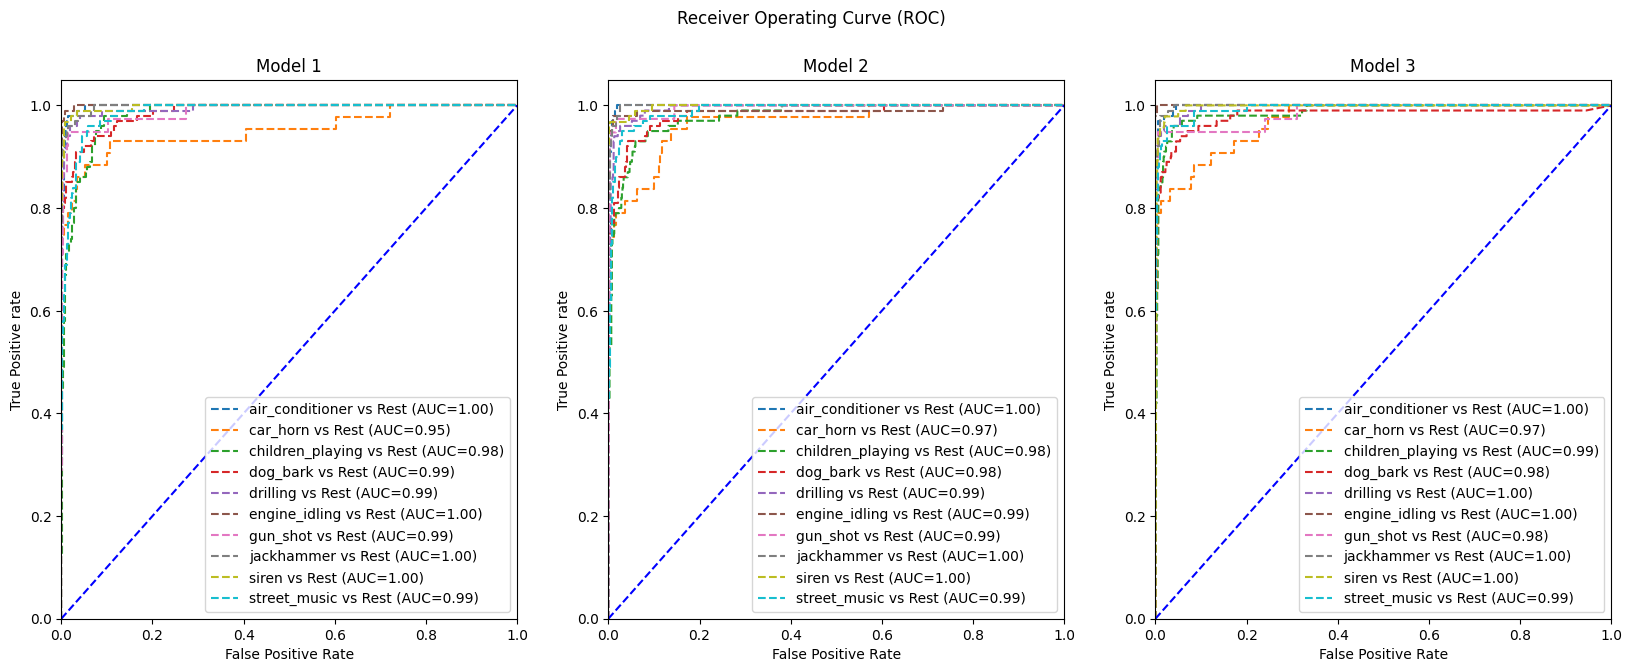

In [33]:
# Figure Setting for Subplots
fig, (axs1,axs2,axs3) = plt.subplots(1,3, figsize=(20, 7))
fig.suptitle('Receiver Operating Curve (ROC)')

# roc curves for model 1
fpr_1 = {}
tpr_1 = {}
thresh_1 ={}
roc_auc_1 = dict()
# roc curves for model  2
fpr_2 = {}
tpr_2 = {}
thresh_2 ={}
roc_auc_2 = dict()
# roc curves for model 3
fpr_3 = {}
tpr_3 = {}
thresh_3 ={}
roc_auc_3 = dict()

n_class = np.shape(classes)[0]


for i in range(n_class):    
    fpr_1[i], tpr_1[i], thresh_1[i] = roc_curve(y_test[:,i], pred_prob_1[:,i])
    roc_auc_1[i] = auc(fpr_1[i], tpr_1[i])# creating roc curve for model1
    
    fpr_2[i], tpr_2[i], thresh_2[i] = roc_curve(y_test[:,i], pred_prob_2[:,i])
    roc_auc_2[i] = auc(fpr_2[i], tpr_2[i])# creating roc curve for model2
    
    fpr_3[i], tpr_3[i], thresh_3[i] = roc_curve(y_test[:,i], pred_prob_3[:,i])
    roc_auc_3[i] = auc(fpr_3[i], tpr_3[i])# creating roc curve for model 3
    
    
    # plotting  

    axs1.plot(fpr_1[i], tpr_1[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc_1[i]))
    
    axs2.plot(fpr_2[i], tpr_2[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc_2[i]))

    axs3.plot(fpr_3[i], tpr_3[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc_3[i]))

#Setting axis for the plots

axs1.plot([0,1],[0,1],'b--')
axs1.set_xlim([0,1])
axs1.set_ylim([0,1.05])
axs1.set_title('Model 1')
axs1.set_xlabel('False Positive Rate')
axs1.set_ylabel('True Positive rate')
axs1.legend(loc='lower right')
    
axs2.plot([0,1],[0,1],'b--')
axs2.set_xlim([0,1])
axs2.set_ylim([0,1.05])
axs2.set_title('Model 2')
axs2.set_xlabel('False Positive Rate')
axs2.set_ylabel('True Positive rate')
axs2.legend(loc='lower right')

axs3.plot([0,1],[0,1],'b--')
axs3.set_xlim([0,1])
axs3.set_ylim([0,1.05])
axs3.set_title('Model 3')
axs3.set_xlabel('False Positive Rate')
axs3.set_ylabel('True Positive rate')
axs3.legend(loc='lower right')

plt.show()

The model with most of the curves near the top right corner (close to 1) will have the highest scores. Although all the models show very good scores, we will select the third (tunned) model, that has all the scores at either 99% or 100%, with only the score for car horn at 97% which also the best in all three models and is not bad at all. Thus our best model is the third model that we optimized using random search. 